3rd ASTERICS-OBELICS International School - Annecy, France - 8-12 April 2019

### Machine Learning Tutorial

# Section 1.a - Introduction to Machine Learning 
by [Emille Ishida](https://www.emilleishida.com/)

### *Take home message 1: Know thy data!*

**Goal:** 1. get acquainted with the data  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. formulate a learning framework  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. weight our expectations

**Data**: SDSS DR14 as available through [Kaggle](https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey#Skyserver_SQL2_27_2018%206_51_39%20PM.csv) - minus a few columns  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;9150 objects (lines)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;7 features (columns)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**objid**: object identifier  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**u**: u-band magnitude  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**g**: g-band magnitude  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**r**: r-band magnitude  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i**: i-band magnitude  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**z**: z-band magnitude  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**class**: source classification  

**Task**: Classification

In [1]:
# import some basic libaries 
import numpy as np
import pandas as pd
import seaborn as sns

Let's beging by loading and taking a look in the first entries in our data

In [2]:
# Read data
data = pd.read_csv('../data/SDSS_star_galaxy.csv')

### Tip #1: Be suspicious, always!

You should always begin by ensuring you know in what grounds you stand. 
Before any analysis starts, ask yourself questions like:

------------------------------------------------------------------------------------------------------------------
#### What are the features in your data? Do they agree with the documentation?

In [3]:
data.keys()

Index(['objid', 'u', 'g', 'r', 'i', 'z', 'class'], dtype='object')

Answer: *yes, they do agree with documentation*

-------------------------------------------------------------------------------------------------------

#### What about the number of objects in your data?

In [4]:
data.shape

(9150, 7)

Answer: *Documentation is correct*

-----------------------------------------------------------------------------------

#### When you first read the list of features in the data, did  you have any expectations regarding the values of each column in the data matrix? Ex. type of entry, range, expected correlations, allowed ranges, etc.  Do the data fultill these expectations?

In [5]:
data.describe()

,objid,u,g,r,i,z
count,9.150000e+03,9150.000000,9150.000000,9150.000000,9150.000000,9150.000000
mean,1.237650e+18,18.589297,17.250536,16.686981,16.418556,16.250796
std,1.533524e+05,0.842478,0.876612,0.961771,1.027774,1.085480
min,1.237650e+18,12.988970,12.799550,12.431600,11.947210,11.610410
25%,1.237650e+18,18.124177,16.737642,16.103342,15.790297,15.551233
50%,1.237650e+18,18.822605,17.415660,16.757515,16.448885,16.263595
75%,1.237650e+18,19.246003,17.893400,17.369435,17.097865,16.959817
max,1.237650e+18,19.599900,19.918970,24.802040,28.179630,22.833060


In [6]:
data.groupby('class').nunique()

,objid,u,g,r,i,z,class
class,,,,,,,
GALAXY,1,4920,4942,4949,4953,4970,1
STAR,1,4123,4128,4127,4131,4131,1


Answer: values seems within reasonable ranges, not -99, NaN or similar things

-----------------------------------------------------------------------------------------------------------------

#### Are there any obvious correlations among the features?

In order to properly answer this data, we need first to remove from the data frame features which are not relevant for this question

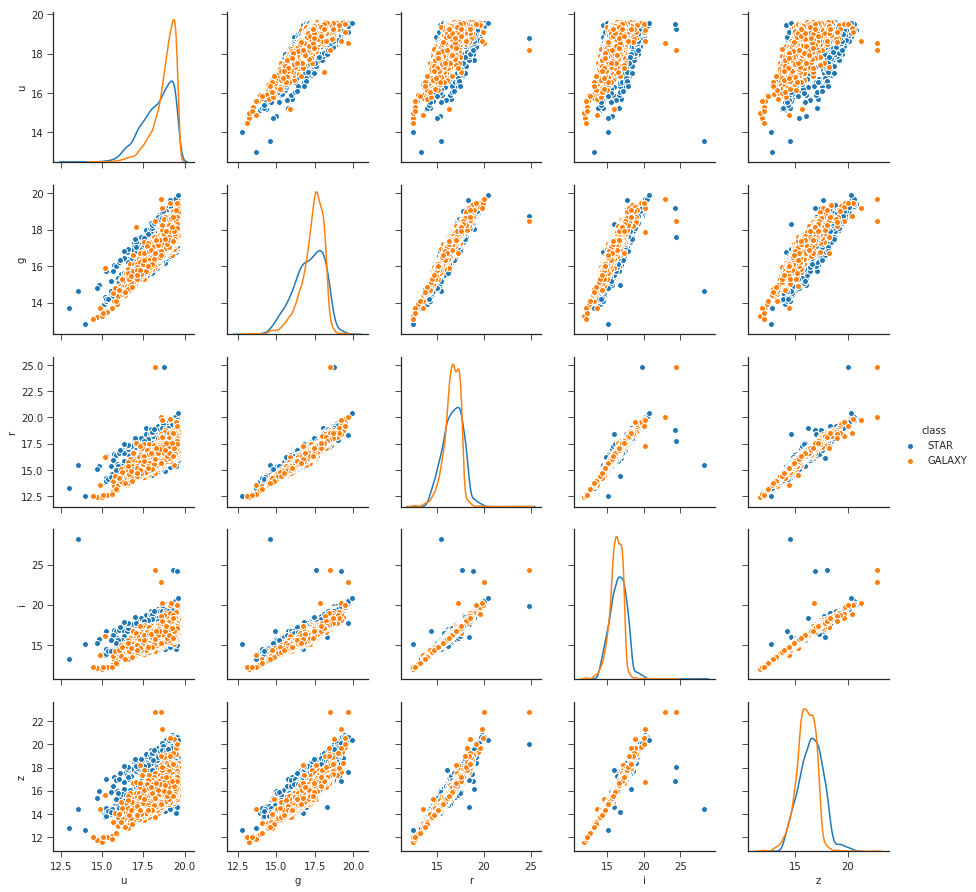

In [7]:
# make a new instance of the data, with the non-relevant collumns removed
data_corr = data.drop(['objid'], axis=1)

# plot every possible remaining pair of features, color according to the classes
sns.set_style('ticks')
fig1 = sns.pairplot(data_corr, hue='class',diag_kind='kde')
plt.show()

-----------------------------------------------------------------------------------------------------------------

#### Is there any class that can be obviously separated based on 1 feature? Is the answer in agreement with your initial expectations?

Answer: *There are no obvious correlations, as expected.*

### Tip #2: do not ignore your domain knowledge!

In astronomy, an observational science, the data only tells part of the story. 
We know, for example, that galaxy colors carry a lot of information. We also know that at we should keep at least one magnitude so we do not loose overall brightness information.  So, let's try to use r-band magnitudes and colors  and check correlations again.

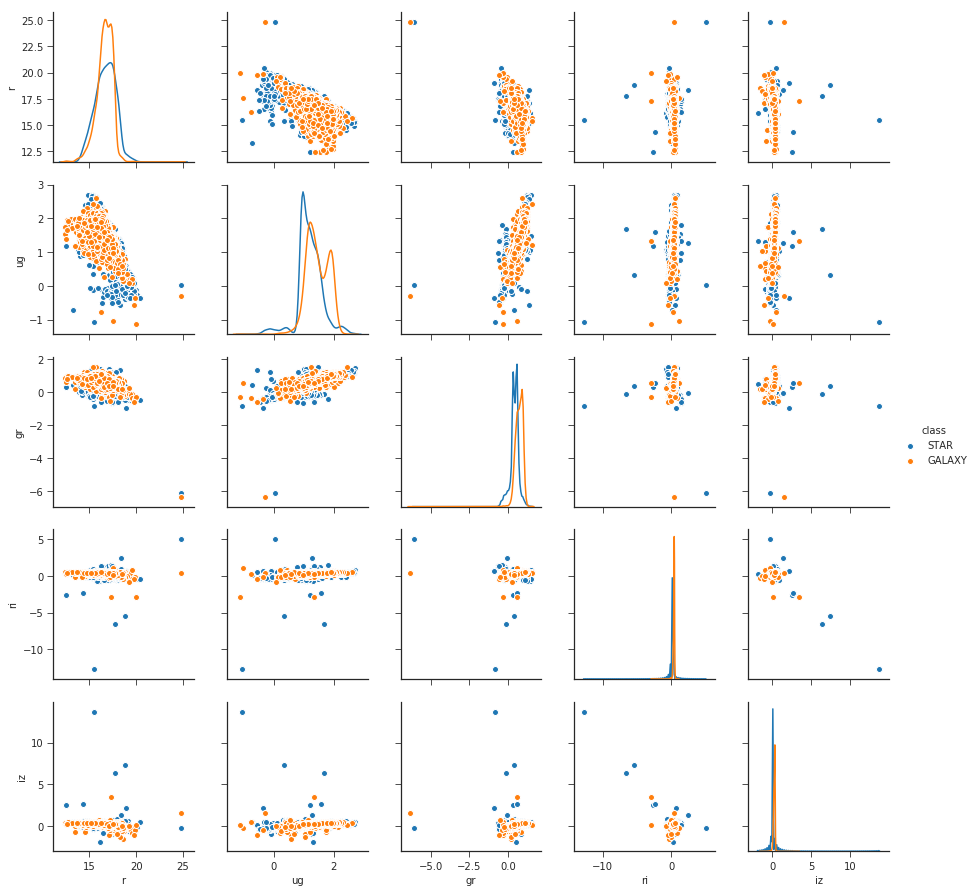

In [9]:
# construct data dictionary
data_color_dict = {'class': data['class'],
                   'r': data['r'],
                   'ug': data['u']-data['g'],
                   'gr': data['g'] - data['r'],
                   'ri': data['r'] - data['i'],
                   'iz': data['i'] - data['z']}

# create data frame
data_color = pd.DataFrame(data_color_dict)

# plot
fig2 = sns.pairplot(data_color, hue='class', diag_kind='kde')
plt.show()

In [12]:
ug=data['u']-data['g']